# Vodafone Customer Churn Project

### **Project Description**
#### Customer Churn is the percentage of customers that stopped using a companys' product or service during a certain time frame.In business, understanding the primary cause of a customer churn can assist businesses to create a retention strategy to reduce customer churn and as such boost revenue.This project seeks to build a powerful machine learning pipeline that will estimate or predict the likelihood of a customer leaving vodafone or not.

### **Null Hypothesis**: Customers with high monthly charges do not have the tendency to churn

### **Alternate Hypothesis**:Customers with high monthly Charges have the tendency to churn

### **Analytical Questions**
#### 1.  Which payment method is the most popular?
#### 2.  Which internet service was purchased the most?
#### 3.  Which gender recorded the highest churn
#### 4.  Which one of the contract types did the highest churn
#### 5.  Which age group did the highest churn
#### 6.  Does high monthly charges affect the churn rate

### Step 1. Import the necessary Libraries

In [1]:
# Data manipulation packages
import pandas as pd
import numpy as np
 
#Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
 
# Machine learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import set_config
# from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB

from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest,mutual_info_classif

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
 
 
# Database connection package
import pyodbc
from dotenv import dotenv_values
 
# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")

### Step 2 & 3. Loading and Reading Data

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
 
 
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [3]:
# code to connect the sever, database, username and passward
conn_str =f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# connection to the server
connection = pyodbc.connect(conn_str)


In [5]:
query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


It can be seen that the data from SQL has 3000 records and 21 columns

In [8]:
#Check for sum of missing values in all columns
data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [9]:
#check percentage of missing values in all columns
(data.isnull().sum()/(len(data)))*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        8.966667
InternetService      0.000000
OnlineSecurity      21.700000
OnlineBackup        21.700000
DeviceProtection    21.700000
TechSupport         21.700000
StreamingTV         21.700000
StreamingMovies     21.700000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.166667
Churn                0.033333
dtype: float64

In [10]:
data.shape

(3000, 21)

In [11]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [12]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['customerID', 'gender', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Churn'],
      dtype='object')
Numerical Variables:
['tenure', 'MonthlyCharges', 'TotalCharges']


In [13]:
# Second dataset
data_2 = pd.read_excel('Telco-churn-second-2000.xlsx')

In [14]:
# Third dataset
data_3 = pd.read_csv('LP2_Telco-churn-last-2000.csv')

In [15]:
data_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [16]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [17]:
data_3.shape

(2043, 21)

### Step 4. Merging and Cleaning Data

In [18]:
#Merging the SQL and CSV dataset

vodafone_df= pd.concat([data,data_3])
vodafone_df.to_csv('vodafone_customer_churn.csv')

In [19]:
voda_df= pd.read_csv('vodafone_customer_churn.csv')

In [20]:
voda_df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [21]:
voda_df.shape

(5043, 22)

In [22]:
#Drop unnamed column in the dataset
voda_df= voda_df.drop('Unnamed: 0', axis='columns')

In [23]:
#Drop customerID column in the dataset
# We drop the customer column because 
#we not be using it in our analysis as the customer ID does not have an influence on customer churn

voda_df= voda_df.drop('customerID', axis='columns')

In [24]:
voda_df.shape

(5043, 20)

In [25]:
voda_df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [26]:
#checking data types of the dataset
voda_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [27]:
voda_df['Churn'].unique()

array(['False', 'True', nan, 'No', 'Yes'], dtype=object)

In [28]:
voda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [29]:
# From .info().it can be seen Total charges is an object data type so we  must convert 
#total charges column into numerical datatype

 
voda_df.TotalCharges = pd.to_numeric(voda_df.TotalCharges, errors='coerce')


In [30]:
voda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [31]:
voda_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [32]:
voda_df.describe(include='object').T

,count,unique,top,freq
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296
TechSupport,4392,5,False,1476


In [33]:
#Check for sum of missing values in all columns
voda_df.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [34]:
#As can be seen from above there are 8 missing values for totalcharges so we fill with the mean

voda_df['TotalCharges'].fillna(value= voda_df["TotalCharges"].mean(), inplace= True)

In [35]:
#As can be seen from above there is 1 missing value for churn so we fill with the mode.
#The mode() function returns the most frequently occurring value in the column

voda_df['Churn'].fillna(voda_df["Churn"].mode()[0], inplace= True)

In [36]:
voda_df['Churn'].unique()

array(['False', 'True', 'No', 'Yes'], dtype=object)

In [37]:
# Unifying the Churn Column Values to Yes or No for better readability

voda_df['Churn'].replace({'False': 'No', 'True': 'Yes'}, inplace=True)



In [38]:

voda_df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

### Univariant Analysis

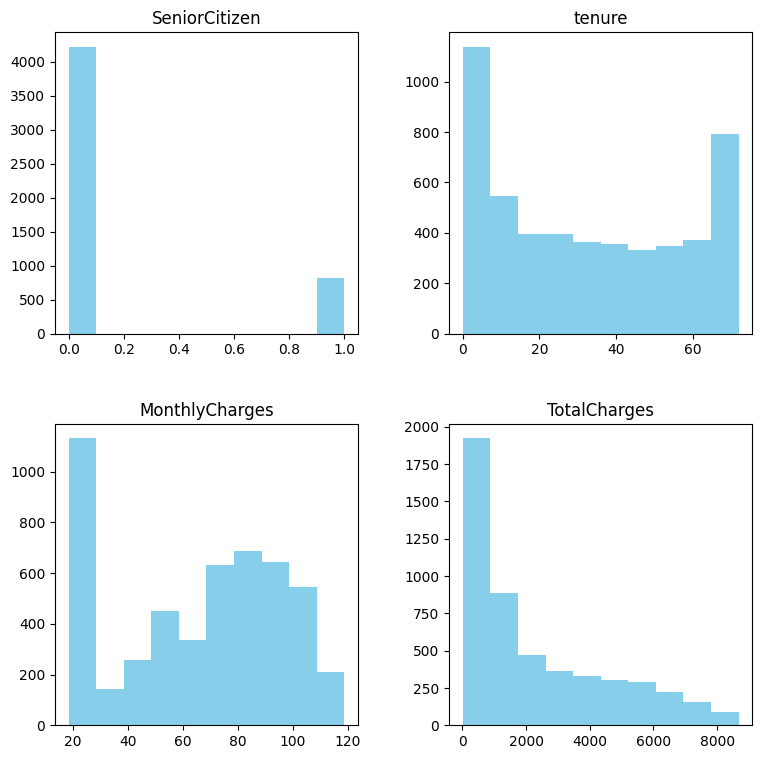

In [39]:
voda_df.hist(figsize=(9,9), grid=False, color='skyblue')
plt.show()

### Bi-variant Analysis

In [40]:
correlation=voda_df.corr(numeric_only=True)
correlation

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.004597,0.221780,0.095198
tenure,0.004597,1.000000,0.240645,0.825106
MonthlyCharges,0.221780,0.240645,1.000000,0.646568
TotalCharges,0.095198,0.825106,0.646568,1.000000


<Axes: >

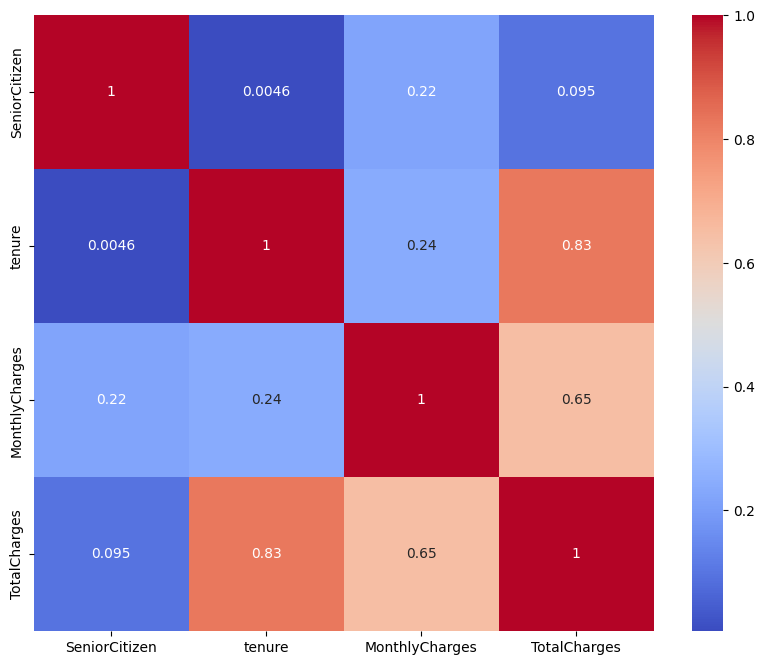

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation,annot=True,cmap='coolwarm')

### Multivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

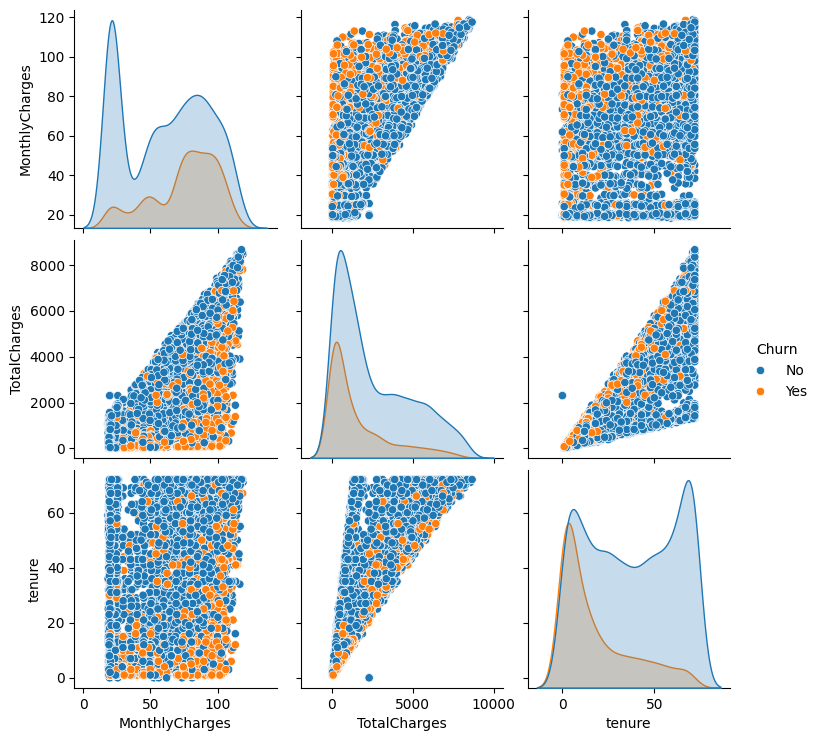

In [42]:
data = voda_df[['Churn', 'MonthlyCharges','TotalCharges','tenure']]

sns.pairplot(data, hue='Churn')
plt.show

## Answering the Analytical Questions

1.Which payment method is the most popular?

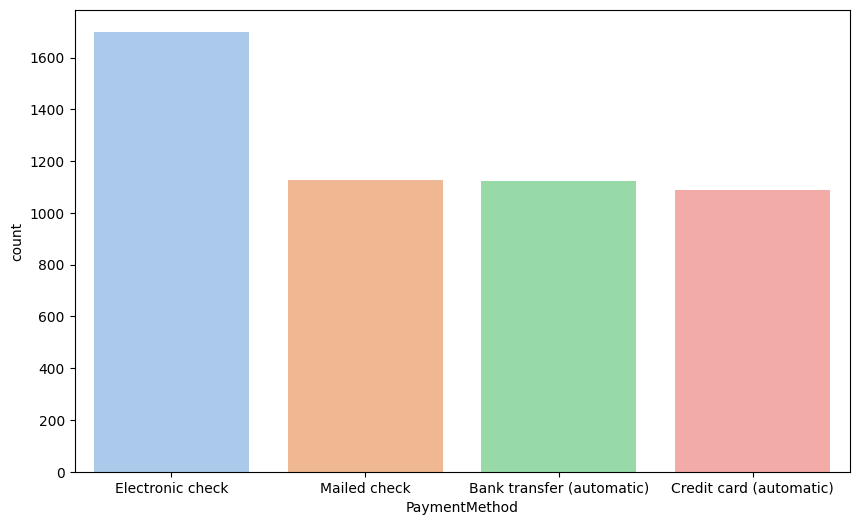

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data=voda_df, x='PaymentMethod', palette="pastel")
plt.show()

It can be seen from the graph that electronic check is the most popular payment method



  2.Which internet service was purchased the most?
 

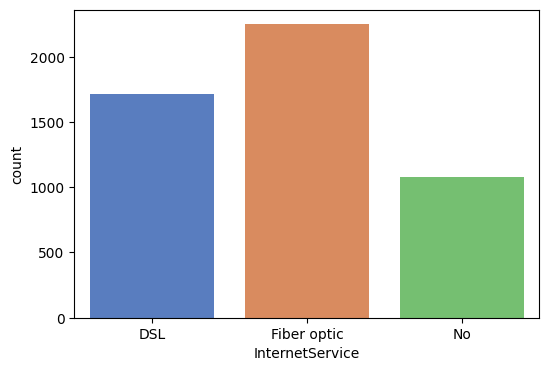

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='InternetService', palette="muted")
plt.show()

Fibre optic internet service was purchased the most as can be seen from the visual

3.Which gender recorded the highest churn

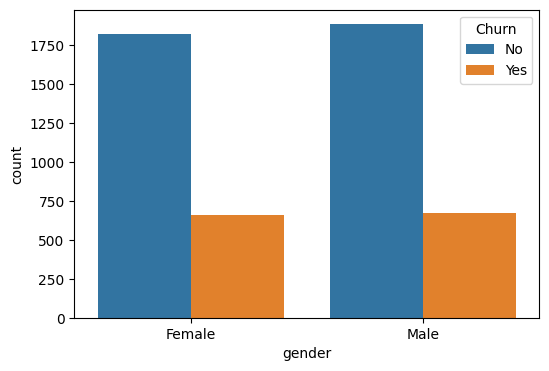

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='gender', hue="Churn")
plt.show()

4. Which one of the contract types did the highest churn

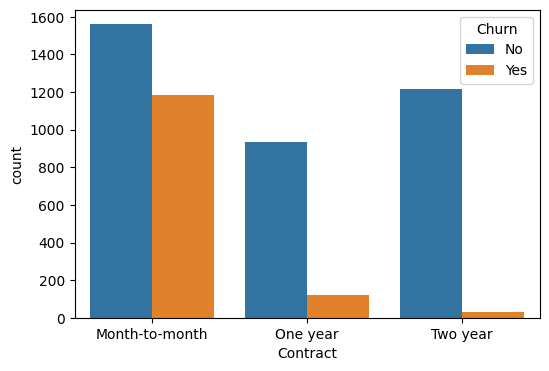

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='Contract', hue="Churn")
plt.show()

Month to month contract type has the highest churn. This may be because month to month contract type may not have a fixed contract signed

5.Which age group did the highest churn

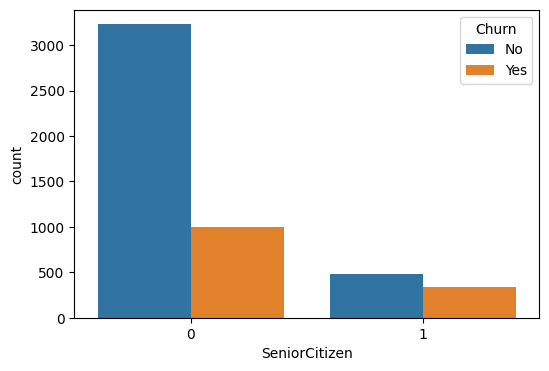

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='SeniorCitizen', hue="Churn")
plt.show()

Insights

It can be seen from the graph that,non senior citizens(0) has the highest churn compared to senior citizens. however,over 80 % of senior citizens churned compared to about 40% of the non senior citizens that churned. we therefore conclude that senior citizens churned the most

6.Does high monthly charges affect the churn rate

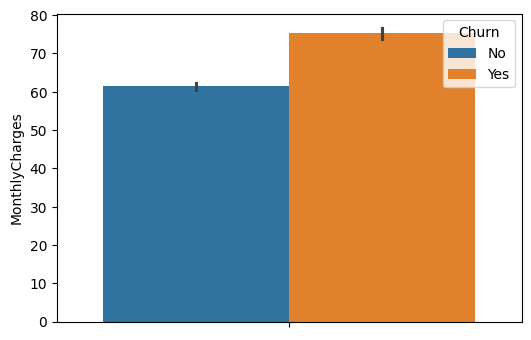

In [48]:
plt.figure(figsize=(6,4))
sns.barplot(data=voda_df, y='MonthlyCharges', hue="Churn")
plt.show()